In [66]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [45]:
import pandas as pd

df= pd.read_csv("data.csv")

In [46]:
df.head()

,Unnamed: 0,ID,0,1,2,3,4,5,6,7,...,f9,fa,fb,fc,fd,fe,ff,??,size,Class
0,0,01azqd4InC7m9JpocGv5,601905,3905,2816,3832,3345,3242,3650,3201,...,3101,3211,3097,2758,3099,2759,5753,1824,4.234863,9
1,1,01IsoiSMh5gxyDYTl4CB,39755,8337,7249,7186,8663,6844,8420,7589,...,439,281,302,7639,518,17001,54902,8588,5.538818,2
2,2,01jsnpXSAlgw6aPeDxrU,93506,9542,2568,2438,8925,9330,9007,2342,...,2242,2885,2863,2471,2786,2680,49144,468,3.887939,9
3,3,01kcPWA9K2BOxQeS5Rju,21091,1213,726,817,1257,625,550,523,...,485,462,516,1133,471,761,7998,13940,0.574219,1
4,4,01SuzwMJEIXsK7A8dQbl,19764,710,302,433,559,410,262,249,...,350,209,239,653,221,242,2199,9008,0.370850,8


In [47]:
y = df['Class'].copy()
y.unique()

array([9, 2, 1, 8, 6, 3, 7, 5, 4], dtype=int64)

In [48]:
X = df[df.columns[2:-1]]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,f8,f9,fa,fb,fc,fd,fe,ff,??,size
0,601905,3905,2816,3832,3345,3242,3650,3201,2965,3205,...,3687,3101,3211,3097,2758,3099,2759,5753,1824,4.234863
1,39755,8337,7249,7186,8663,6844,8420,7589,9291,358,...,6536,439,281,302,7639,518,17001,54902,8588,5.538818
2,93506,9542,2568,2438,8925,9330,9007,2342,9107,2457,...,2358,2242,2885,2863,2471,2786,2680,49144,468,3.887939
3,21091,1213,726,817,1257,625,550,523,1078,473,...,873,485,462,516,1133,471,761,7998,13940,0.574219
4,19764,710,302,433,559,410,262,249,422,223,...,947,350,209,239,653,221,242,2199,9008,0.370850


In [49]:
X_column_names = X.columns

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
StandardScaler()
X = scaler.transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify=y, random_state = 42)

### Logistic Regression with L1

In [54]:
alpha_list = [.01, .03, .1, .3, 1, 3, 10, 30, 100]
cross_val = list(range(9))
for i in list(range(9)):
    l1_1_model = LogisticRegression(penalty="l1", C = alpha_list[i], random_state= 42, max_iter= 40, solver='saga')
    cross_val[i] = cross_val_score(l1_1_model, X , y, cv = 2, scoring = 'accuracy')

C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

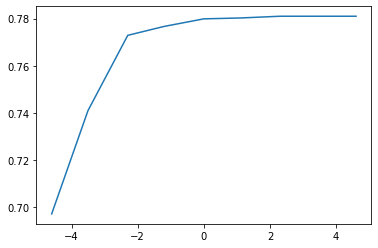

In [55]:
plt.plot(np.log(alpha_list), np.mean(cross_val, axis = 1))
plt.show()

In [154]:
model =  LogisticRegression(penalty="l1", C = 100, random_state= 42, max_iter= 1000, solver='saga')
model.fit(X_train, y_train)

C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [178]:
y_pred = model.predict(X_test)

In [179]:
sklearn.metrics.confusion_matrix(y_pred, y_test, sample_weight=None, normalize=None)

array([[293,  26,   0,   1,   0,  10,   2,  12,  11],
       [  2, 422,   0,   0,   0,   1,   0,   0,   3],
       [  1,   7, 588,   0,   0,   3,   0,   1,   1],
       [  2,   2,   0,  92,   3,  10,   0,   5,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4,  16,   0,   1,   0, 114,   3,   0,   2],
       [  1,   1,   0,   0,   4,   1,  75,   0,   1],
       [  1,  13,   0,   0,   1,   6,   0, 225,   8],
       [  4,   9,   0,   1,   0,   5,   0,   3, 176]], dtype=int64)

In [180]:
model.score(X_test, y_test)

0.9130634774609016

In [181]:
F1_Score= f1_score(y_test, y_pred,  average='weighted')
print("F1 Score",F1_Score)

F1 Score 0.9113338921132933


### Logistic Regression No penalty

In [159]:
log_model = LogisticRegression(penalty = 'none', max_iter = 1000, solver = 'saga')
log_model.fit(X_train, y_train)

C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
y_pred_log = log_model.predict(X_test)

In [183]:
sklearn.metrics.confusion_matrix(y_pred_log, y_test, sample_weight=None, normalize=None)

array([[293,  26,   0,   1,   0,  10,   2,  12,  11],
       [  2, 422,   0,   0,   0,   1,   0,   0,   3],
       [  1,   7, 588,   0,   0,   3,   0,   1,   1],
       [  2,   2,   0,  92,   3,  10,   0,   5,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4,  16,   0,   1,   0, 114,   3,   0,   2],
       [  1,   1,   0,   0,   4,   1,  75,   0,   1],
       [  1,  13,   0,   0,   1,   6,   0, 225,   8],
       [  4,   9,   0,   1,   0,   5,   0,   3, 176]], dtype=int64)

In [184]:
log_model.score(X_test, y_test)

0.9130634774609016

In [185]:
F1_Score= f1_score(y_test, y_pred_log,  average='weighted')
print("F1 Score",F1_Score)

F1 Score 0.9113338921132933


### L2 penalty

In [65]:
alpha_list = [.03, .1, .3, 1, 3, 10, 30, 100]
cross_val_l2 = list(range(8))
for i in list(range(8)):
    l2_1_model = LogisticRegression(penalty="l2", C = alpha_list[i], random_state= 42, max_iter=50, solver='saga')
    cross_val_l2[i] = cross_val_score(l1_1_model, X , y, cv = 2, scoring = 'accuracy')

C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

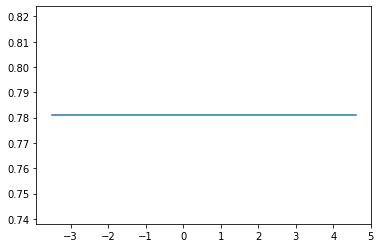

In [82]:
plt.plot(np.log(alpha_list), np.mean(cross_val_l2, axis = 1))
plt.show()

In [165]:
l2_model =  LogisticRegression(penalty="l2", C = 1, random_state= 42, max_iter= 1000, solver='saga')
l2_model.fit(X_train, y_train)

C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [186]:
y_pred_l2 = model.predict(X_test)

In [187]:
sklearn.metrics.confusion_matrix(y_pred_l2, y_test, sample_weight=None, normalize=None)

array([[293,  26,   0,   1,   0,  10,   2,  12,  11],
       [  2, 422,   0,   0,   0,   1,   0,   0,   3],
       [  1,   7, 588,   0,   0,   3,   0,   1,   1],
       [  2,   2,   0,  92,   3,  10,   0,   5,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4,  16,   0,   1,   0, 114,   3,   0,   2],
       [  1,   1,   0,   0,   4,   1,  75,   0,   1],
       [  1,  13,   0,   0,   1,   6,   0, 225,   8],
       [  4,   9,   0,   1,   0,   5,   0,   3, 176]], dtype=int64)

In [188]:
l2_model.score(X_test, y_test)

0.9126034958601656

In [189]:
F1_Score= f1_score(y_test, y_pred_l2,  average='weighted')
print("F1 Score",F1_Score)

F1 Score 0.9113338921132933


### Elastic 

In [92]:
alpha_list = [.01, .03, .1, 1, 10,100,1000 ]
cross_val_el = list(range(7))
for i in list(range(7)):
    el_1_model = LogisticRegression(penalty="elasticnet",l1_ratio = .5, C = alpha_list[i], random_state= 42, max_iter=50, solver='saga')
    cross_val_el[i] = cross_val_score(el_1_model, X , y, cv = 2, scoring = 'accuracy')

C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

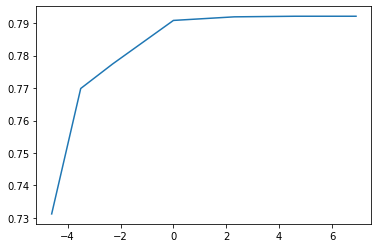

In [93]:
plt.plot(np.log(alpha_list), np.mean(cross_val_el, axis = 1))
plt.show()

In [170]:
el_model =  LogisticRegression(penalty="elasticnet",l1_ratio = .5, C = 100, random_state= 42, max_iter=1000, solver='saga')
el_model.fit(X_train, y_train)

C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [190]:
y_pred_el = el_model.predict(X_test)
sklearn.metrics.confusion_matrix(y_pred_el, y_test, sample_weight=None, normalize=None)

array([[293,  26,   0,   1,   0,  10,   2,  12,  11],
       [  2, 422,   0,   0,   0,   1,   0,   0,   3],
       [  1,   7, 588,   0,   0,   3,   0,   1,   1],
       [  2,   2,   0,  92,   3,  10,   0,   5,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4,  16,   0,   1,   0, 114,   3,   0,   2],
       [  1,   1,   0,   0,   4,   1,  75,   0,   1],
       [  1,  13,   0,   0,   1,   6,   0, 225,   8],
       [  4,   9,   0,   1,   0,   5,   0,   3, 176]], dtype=int64)

In [191]:
el_model.score(X_test, y_test)

0.9130634774609016

In [192]:
F1_Score= f1_score(y_test, y_pred_el,  average='weighted')
print("F1 Score",F1_Score)

F1 Score 0.9113338921132933


### Multiclass Classfier

#### hidden layers = 100

In [98]:
from sklearn.neural_network import MLPClassifier

In [99]:
clf = MLPClassifier(hidden_layer_sizes = 100, max_iter=300, random_state = 42) #solver(adam) and tol(1e-4) are default

In [100]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [174]:
y_pred_clf = clf.predict(X_test)

In [175]:
sklearn.metrics.confusion_matrix(y_pred_clf, y_test, sample_weight=None, normalize=None)

array([[298,  15,   0,   2,   0,   1,   1,   2,   7],
       [  3, 447,   0,   0,   0,   2,   0,   0,   8],
       [  0,   1, 586,   0,   0,   0,   0,   0,   1],
       [  0,   1,   0,  92,   0,   1,   0,   0,   1],
       [  1,   0,   0,   0,   7,   1,   0,   0,   0],
       [  2,   3,   2,   1,   0, 143,   0,   4,   1],
       [  0,   2,   0,   0,   0,   0,  79,   0,   1],
       [  2,  21,   0,   0,   1,   2,   0, 240,   3],
       [  2,   6,   0,   0,   0,   0,   0,   0, 181]], dtype=int64)

In [176]:
clf.score(X_test, y_test)

0.953541858325667

In [177]:
F1_Score= f1_score(y_test, y_pred_clf,  average='weighted')
print("F1 Score",F1_Score)

F1 Score 0.953508239354084


### for different hidden layer values

In [150]:
clf_max = MLPClassifier(hidden_layer_sizes = 150, max_iter=500, random_state = 42)
clf_max.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=150, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [151]:
y_pred_clf_max = clf_max.predict(X_test)
sklearn.metrics.confusion_matrix(y_pred_clf_max, y_test, sample_weight=None, normalize=None)

array([[297,  21,   0,   2,   0,   1,   0,   3,   7],
       [  2, 441,   0,   0,   0,   2,   0,   1,   9],
       [  1,   1, 586,   0,   0,   0,   0,   0,   1],
       [  1,   2,   0,  92,   0,   1,   0,   0,   1],
       [  1,   1,   0,   0,   7,   1,   0,   0,   0],
       [  1,   3,   2,   1,   0, 144,   0,   3,   1],
       [  0,   2,   0,   0,   0,   0,  80,   0,   0],
       [  3,  16,   0,   0,   1,   1,   0, 238,   2],
       [  2,   9,   0,   0,   0,   0,   0,   1, 182]], dtype=int64)

In [152]:
clf_max.score(X_test, y_test)

0.9507819687212512

In [153]:
hidden_final = [50,100, 150,175, 200, 250]
iterations_final = [50, 100, 250, 400]
accuracy_scores_total = {}

In [145]:
for i in range(len(hidden_final)):
    for j in range(len(iterations_final)):
        clf_test = MLPClassifier(hidden_layer_sizes = hidden_final[i] , max_iter= iterations_final[j], random_state = 42).fit(X_train, y_train)
        accuracy_scores_total[(i,j)] = clf_test.score(X_test, y_test)

C:\Users\shahi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, Conver

In [146]:
print(accuracy_scores_total)

{(0, 0): 0.9342226310947562, (0, 1): 0.9438822447102115, (0, 2): 0.9415823367065317, (0, 3): 0.9402023919043239, (1, 0): 0.937442502299908, (1, 1): 0.9448022079116836, (1, 2): 0.9517019319227231, (1, 3): 0.953541858325667, (2, 0): 0.9461821527138914, (2, 1): 0.953541858325667, (2, 2): 0.9503219871205152, (2, 3): 0.9507819687212512, (3, 0): 0.9452621895124195, (3, 1): 0.9475620975160993, (3, 2): 0.9572217111315547, (3, 3): 0.9572217111315547, (4, 0): 0.9471021159153634, (4, 1): 0.9498620055197792, (4, 2): 0.9507819687212512, (4, 3): 0.9507819687212512, (5, 0): 0.9480220791168353, (5, 1): 0.9420423183072677, (5, 2): 0.9576816927322908, (5, 3): 0.9576816927322908}


[50, 100, 150, 175, 200, 250] 50 [0.9342226310947562, 0.937442502299908, 0.9461821527138914, 0.9452621895124195, 0.9471021159153634, 0.9480220791168353]
[50, 100, 150, 175, 200, 250] 100 [0.9438822447102115, 0.9448022079116836, 0.953541858325667, 0.9475620975160993, 0.9498620055197792, 0.9420423183072677]
[50, 100, 150, 175, 200, 250] 250 [0.9415823367065317, 0.9517019319227231, 0.9503219871205152, 0.9572217111315547, 0.9507819687212512, 0.9576816927322908]
[50, 100, 150, 175, 200, 250] 400 [0.9402023919043239, 0.953541858325667, 0.9507819687212512, 0.9572217111315547, 0.9507819687212512, 0.9576816927322908]


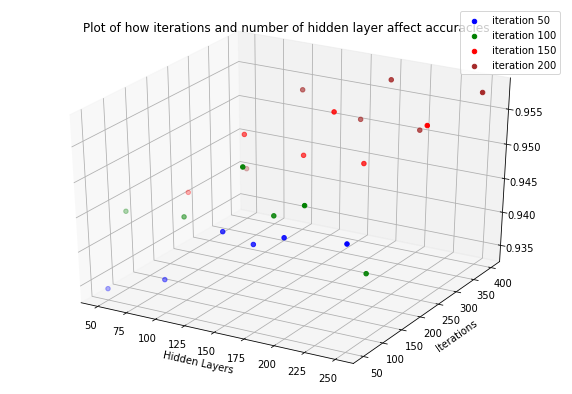

In [147]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
colors = ['blue', 'green', 'red', 'brown']
# Creating plot
for i in range(4):
    points = []
    for j in range(6):
        points.append(accuracy_scores_total[(j,i)])
    ax.scatter3D(hidden_final,iterations_final[i] , points, color = colors[i])
    print(hidden_final,iterations_final[i] , points)
    plt.legend(['iteration 50', 'iteration 100', 'iteration 150', 'iteration 200' ])
    
    
plt.xlabel('Hidden Layers')
plt.ylabel('Iterations')
plt.title("Plot of how iterations and number of hidden layer affect accuracies")
# show plot
plt.show()

### Random Forest using Gini

In [217]:
from sklearn.tree import plot_tree

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf_rf = RandomForestClassifier(n_estimators=100)

In [119]:
clf_rf.fit(X_train,y_train)

y_pred_clf = clf_rf.predict(X_test)    

In [120]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_clf))

Accuracy: 0.983900643974241


In [121]:
sklearn.metrics.confusion_matrix(y_pred_clf, y_test, sample_weight=None, normalize=None)

array([[299,   0,   0,   0,   0,   0,   0,   5,   1],
       [  0, 493,   0,   0,   0,   2,   0,   2,   0],
       [  1,   0, 588,   0,   0,   0,   0,   0,   2],
       [  1,   0,   0,  92,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   7,   0,   0,   0,   0],
       [  4,   1,   0,   2,   0, 146,   0,   3,   0],
       [  0,   0,   0,   0,   0,   0,  80,   0,   0],
       [  2,   2,   0,   1,   1,   2,   0, 236,   2],
       [  1,   0,   0,   0,   0,   0,   0,   0, 198]], dtype=int64)

In [123]:
F1_Score= f1_score(y_test, y_pred_clf,  average='weighted')
print("F1 Score",F1_Score)

F1 Score 0.9839114217858254


#### Random Forest using Entropy 

In [124]:
clf_tree_entropy =RandomForestClassifier(n_estimators=100, criterion = 'entropy')

In [125]:
clf_tree_entropy.fit(X_train,y_train)

y_pred_clf_en = clf_tree_entropy.predict(X_test)  

In [126]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_clf_en))

Accuracy: 0.984360625574977


In [127]:
sklearn.metrics.confusion_matrix(y_pred_clf_en, y_test, sample_weight=None, normalize=None)

array([[300,   1,   0,   0,   0,   0,   0,   7,   0],
       [  0, 493,   0,   0,   0,   0,   0,   2,   0],
       [  0,   0, 588,   0,   0,   0,   0,   0,   1],
       [  1,   0,   0,  93,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   7,   0,   0,   0,   0],
       [  1,   1,   0,   2,   0, 146,   0,   3,   0],
       [  0,   0,   0,   0,   0,   0,  80,   0,   1],
       [  4,   1,   0,   0,   1,   4,   0, 234,   1],
       [  2,   0,   0,   0,   0,   0,   0,   0, 199]], dtype=int64)

In [129]:
F1_Score= f1_score(y_test, y_pred_clf_en,  average='weighted')
print("F1 Score",F1_Score)

F1 Score 0.9843531999691937


### Decision Tree 

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [200]:
clf_at = DecisionTreeClassifier(random_state = 42)

In [201]:
clf_at = clf_at.fit(X_train,y_train)

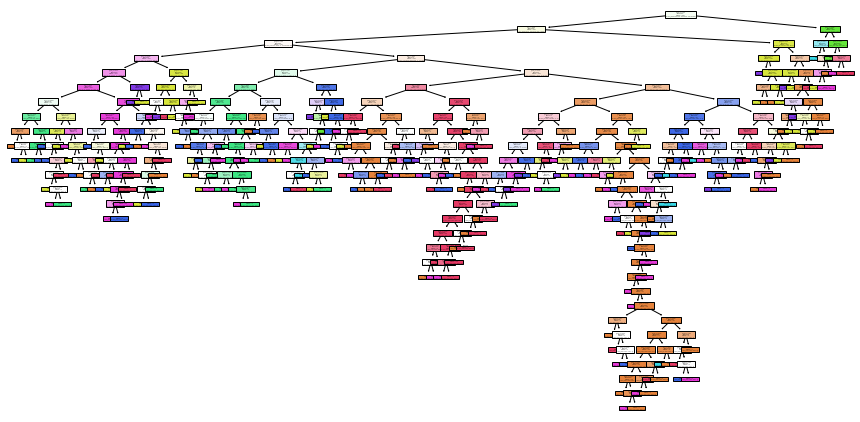

In [202]:
plt.figure(figsize = (15,7.5))
plot_tree(clf_at, filled = True)
plt.show()

In [203]:
y_pred_tree = clf_at.predict(X_test)

In [206]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))

Accuracy: 0.9632014719411224


In [207]:
sklearn.metrics.confusion_matrix(y_pred_tree, y_test, sample_weight=None, normalize=None)

array([[293,   2,   0,   1,   1,   4,   2,   3,   5],
       [  2, 480,   0,   2,   0,   0,   1,   3,   2],
       [  0,   0, 588,   0,   0,   0,   0,   0,   2],
       [  1,   0,   0,  89,   0,   1,   0,   1,   1],
       [  1,   0,   0,   0,   5,   2,   0,   1,   0],
       [  4,   6,   0,   1,   1, 139,   0,   3,   1],
       [  0,   1,   0,   0,   0,   0,  76,   0,   0],
       [  4,   4,   0,   1,   1,   4,   0, 233,   1],
       [  3,   3,   0,   1,   0,   0,   1,   2, 191]], dtype=int64)

In [208]:
F1_Score= f1_score(y_test, y_pred_tree,  average='weighted')
print("F1 Score",F1_Score)

F1 Score 0.9633537324435931


# CONCLUSION

### Methods used was - Logistic Regression (No penalty, L1, L2, elasticnet),
### Multiclass Classifier (used scikit) and plotted the scatter plot of variation of accuracies based on Hidden layers and Maximum Iterations.
### Random Forest using both Gini and Entropy critieon 
### Decision Tree
### Out of all solvers saga performed best and worst was lbfgs 
### Used model score (same as accuracy) and F1 weighted to rate the different models. 
### Rounded off and represented as (Score / Accuracy, F1_score)

### Highest F1 score and accuracy was that of Random Forest with Entropy(0.9843,  0.98435) performing slightly better than Gini ( 0.98390,  0.98391). Followed by Decision Trees (9632, 9633), The value of decision tree is highly depedent on max_depth. The figure shows the decision tree, decision trees often overfit hence pruning can be done to reduce complexity and increase accuracy. 

### MLPClassifier was implemented using Scikit Learn. A 3D scatter plot was made to show the relation of accuracies with both number of hidden layers and maximum iterations. For different maximum iterations we got maximum accuracies for different hidden layer values.  for 50 iterations it was 250 layers and acc =  0.9480, for 100 iterations it was 150 layers and acc = 0.95354 and then maximum was at 250 layers where the model converged giving us highest accuracy of 0.957681 


### Logistic Regression was implement with different solvers and penalties. Hyperparameter was estimated and new model was trained with max_iter of 5000 (later reduced to 1000 as it was giving marginally the same value with much less computation). All models perfomed similarly with accuracy of 0.9130 and F1 score of .9113

### Decision Trees help us visualize the important features of data and pruning can help us narrow down to selected features and nodes also showing us how the alogorithm works but this comes at a cost of not being flexible enough. Their disadvantages is combacted by fandom forests as they are highly accurate because of the number of decision trees participating in the process and because they bootstrap the data.
### MLPclassification can be done using scikit and keras both, both having same results, Logistic Regression works best for binary but for multiple classification it doesnt produce the accuracies as other processes even though it takes more computation